In [2]:
import pandas as pd

df = pd.read_csv('/content/Mall_Customers.csv',index_col = 'CustomerID')

In [3]:
df.head()

Genre  Age  Annual Income (k$)  Spending Score (1-100)
CustomerID                                                         
1             Male   19                  15                      39
2             Male   21                  15                      81
3           Female   20                  16                       6
4           Female   23                  16                      77
5           Female   31                  17                      40

In [4]:
df.describe()

Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000          200.000000              200.000000
mean    38.850000           60.560000               50.200000
std     13.969007           26.264721               25.823522
min     18.000000           15.000000                1.000000
25%     28.750000           41.500000               34.750000
50%     36.000000           61.500000               50.000000
75%     49.000000           78.000000               73.000000
max     70.000000          137.000000               99.000000

In [5]:
df.groupby('Spending Score (1-100)').count()

Genre  Age  Annual Income (k$)
Spending Score (1-100)                                
1                           2    2                   2
3                           1    1                   1
4                           2    2                   2
5                           4    4                   4
6                           2    2                   2
...                       ...  ...                 ...
94                          1    1                   1
95                          2    2                   2
97                          2    2                   2
98                          1    1                   1
99                          1    1                   1

[84 rows x 3 columns]

In [6]:
# names = [0, 1, 2]

# df['Spending Score (1-100)'] = pd.Series(pd.qcut(df['Spending Score (1-100)'],q= 3, labels=names))

In [7]:
df.isna().any()

Genre                     False
Age                       False
Annual Income (k$)        False
Spending Score (1-100)    False
dtype: bool

In [8]:
columns = df.columns.tolist()
columns[0]= 'Gender'
df.columns = columns

In [9]:
df['Gender'] = df['Gender'].astype('category').cat.codes

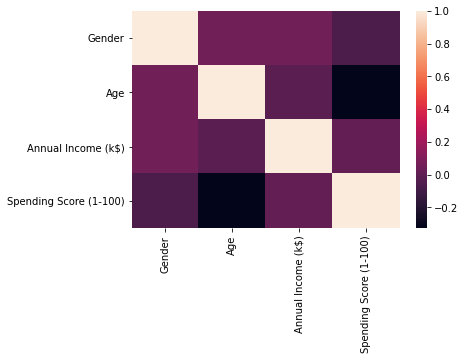

In [10]:
import seaborn as sns

_  = sns.heatmap(df.corr())

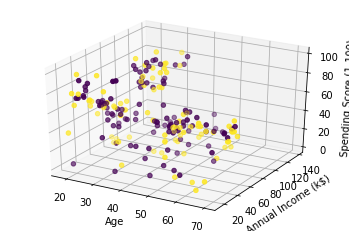

In [11]:
import matplotlib.pyplot as plt
import numpy as np


fig = plt.figure()
ax = plt.axes(projection='3d')
ax.set_xlabel('Age')
ax.set_zlabel('Spending Score (1-100)')
ax.set_ylabel('Annual Income (k$)')
_ = ax.scatter(df['Age'],df['Annual Income (k$)'], df['Spending Score (1-100)'],c=df['Gender'])

dari graphic di atas menunjukan umur muda x1 dengan pemasukan yang tinggi x2 menghasilkan score pengeluaran(target) yang besar dan score tertinggi dipegang oleh female

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error



seed = 42
X = df.drop('Spending Score (1-100)',axis=1)
y = df['Spending Score (1-100)'].values

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=seed)

model = LinearRegression(fit_intercept=True,normalize=False)

model.fit(X_train,y_train)

predict = model.predict(X_test)

In [33]:
print(model.coef_)
print(mean_absolute_error(predict,y_test))
print(mean_squared_error(predict,y_test))
print(mean_squared_error(predict,y_test,squared=False))
print(model.score(X_test,y_test))

[-1.19846561 -0.58792363  0.05386299]
18.151395326685105
480.673141707248
21.924259205438346
0.025478181600745997


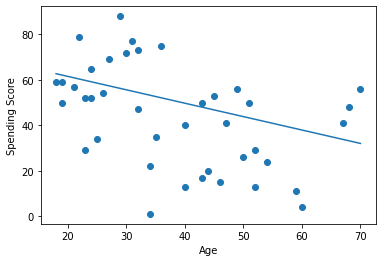

In [55]:

plt.scatter(X_test['Age'],y_test)
# plt.scatter(X_test['Age'],predict)
# plt.scatter(X_test['Annual Income (k$)'],predict)
plt.plot([min(X_test['Age']),max(X_test['Age'])],[model.predict(X_test[X_test['Age'] == min(X_test['Age'])]),model.predict(X_test[X_test['Age'] == max(X_test['Age'])])])
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.show()
